#2019 1st ML month with KaKR
## 캐글 코리아와 함께하는 1st ML 대회 - 타이타닉 생존자를 예측하라!

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,146 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155047 files and d

In [ ]:
! pip install googlemaps
! pip install xlrd

import io
import os
from google.colab import files
from google.colab import drive
import pandas as pd
import folium
import numpy as np
import googlemaps
import math
from folium.features import DivIcon
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVR
import random
from scipy.stats import expon, reciprocal
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from numpy import array
from keras.models import Sequential
from keras.layers import Dense, LSTM
from random import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic') 

  Created wheel for googlemaps: filename=googlemaps-4.5.3-py3-none-any.whl size=38479 sha256=79ba0c36c8e117a0cbf722e3a7c8546b0f9970cca2de1d78c3fb8d340a03c2f2
  Stored in directory: /root/.cache/pip/wheels/fa/1a/1c/cc0b8a1652a3f06aea586b0e4714a81bafed830513969baf92
Successfully built googlemaps


In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_data = pd.read_csv('/content/gdrive/MyDrive/prac/2019-1st-ml-month-with-kakr/train.csv')
test_val = pd.read_csv('/content/gdrive/MyDrive/prac/2019-1st-ml-month-with-kakr/test.csv')

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_val.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#Feature Engineering : 모델이 학습할 수 있도록 데이터를 준비하고 feature를 선별하는 단계
#category value-> numeric part(직접해보기)

print(train_data.iloc[1,11])
for i in range(891):
    temp = train_data.iloc[i,11]
    if temp=="S":
        train_data.iloc[i,11]=0
    if temp=="C":
        train_data.iloc[i,11]=1
    if temp=="Q":
        train_data.iloc[i,11]=2
#train_data.head()

C


In [ ]:
#많이 실수하는 부분 중에 하나 train_set 변경 시 test_set의 value도 같이 바꿔줘야함
for i in range(418):
    temp = test_val.iloc[i,10]
    if temp=="S":
        test_val.iloc[i,10]=0
    if temp=="C":
        test_val.iloc[i,10]=1
    if temp=="Q":
        test_val.iloc[i,10]=2
test_val.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,0


In [ ]:
train_data.Name = train_data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
train_data.head()
test_val.Name =test_val.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
test_val.head()ㅠ

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Mr,male,34.5,0,0,330911,7.8292,NaN,2
1,893,3,Mrs,female,47.0,1,0,363272,7.0000,NaN,0
2,894,2,Mr,male,62.0,0,0,240276,9.6875,NaN,2
3,895,3,Mr,male,27.0,0,0,315154,8.6625,NaN,0
4,896,3,Mrs,female,22.0,1,1,3101298,12.2875,NaN,0


In [ ]:
train_data.iloc[:,3].unique() ##뭐가 많으므로 치환해줘야 한다.
train_data.Name.unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [ ]:
dummy=[]
Mr = ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']
Mrs = ['the Countess', 'Mme', 'Lady']
Miss = ['Mlle', 'Ms']
for i in range(891):
    temp = train_data.iloc[i,3]
    if temp in Mr:
        train_data.iloc[i,3]="Mr"
    elif temp in Mrs:
        train_data.iloc[i,3]="Mrs"
    elif temp in Miss :
        train_data.iloc[i,3]="Miss"
    elif temp =='Dr':
        if train_data.iloc[i,4]=="male":
            train_data.iloc[i,3]="Mr"
        else:
            train_data.iloc[i,3]="Mrs"
    else:
        dummy.append(temp)
        pass

print(set(dummy))

train_data.head()

{'Miss', 'Master', 'Mr', 'Mrs'}


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,0


In [ ]:
dummy=[]
Mr = ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']
Mrs = ['the Countess', 'Mme', 'Lady']
Miss = ['Mlle', 'Ms']

for i in range(418):
    temp = test_val.iloc[i,2]
    if temp in Mr:
        test_val.iloc[i,2]="Mr"
    elif temp in Mrs:
        test_val.iloc[i,2]="Mrs"
    elif temp in Miss :
        test_val.iloc[i,2]="Miss"
    elif temp =='Dr':
        if test_val.iloc[i,3]=="male":
            test_val.iloc[i,2]="Mr"
        else:
            test_val.iloc[i,2]="Mrs"
    elif temp =="Dona":
        test_val.iloc[i,2]="Mrs"
    else:
        dummy.append(temp)
        pass

print(set(dummy))

train_data.head()

{'Miss', 'Master', 'Mr', 'Mrs'}


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,0


In [ ]:
import numpy as np # linear algebra
from sklearn.preprocessing import LabelEncoder

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

#Label encoder를 활용하면 위의 작업을 더 쉽게할 수 있음
Label_encoder=LabelEncoder()
Label_encoder.fit(train_data.Sex)
train_data.loc[:,'Sex'] = Label_encoder.transform(train_data.Sex)
test_val.loc[:,'Sex'] = Label_encoder.transform(test_val.Sex)

#NA value를 채우기 위해 더미 변수 생성
dummy_age =round(train_data.Age.mean(),1)
print(dummy_age)

29.7


In [ ]:
train_data.Age.mean()

29.69911764705882

In [ ]:
Label_encoder=LabelEncoder()
Label_encoder.fit(train_data.Name)
train_data.loc[:,'Name'] = Label_encoder.transform(train_data.Name)
test_val.loc[:,'Name'] = Label_encoder.transform(test_val.Name)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,2,1,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,3,0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,1,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,3,0,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,2,1,35.0,0,0,373450,8.0500,NaN,0


In [ ]:
train_data.Name.unique()

array([2, 3, 1, 0])

In [ ]:
train_data.Age.isnull().sum()

177

In [ ]:
from sklearn import preprocessing


#나이 변수는 중요하므로 scaling해준다
train_data.loc[:, 'Age'] = train_data.Age.fillna(dummy_age)
# train_data.loc[:, 'Age'] = preprocessing.scale(train_data.Age)
test_val.loc[:, 'Age'] = test_val.Age.fillna(dummy_age)
# test_val.loc[:, 'Age'] = preprocessing.scale(test_val.Age)
#category value 중 없는 부분은 우리가 0,1,2로 해줬기 때문에 0 부여
#NA가 2개라서 크게 상관은 없을듯 함
train_data.loc[:, 'Embarked'] = train_data.Embarked.fillna(2)
test_val.loc[:, 'Embarked'] = test_val.Embarked.fillna(2)

#빈곳 채우기 이곳도 마찬가지
val=  train_data.Fare.mean() 
train_data.loc[:, 'Fare'] = train_data.Fare.fillna(val)
# train_data.loc[:, 'Fare'] = preprocessing.scale(train_data.Fare)
test_val.loc[:, 'Fare'] = test_val.Fare.fillna(val)
# test_val.loc[:, 'Fare'] = preprocessing.scale(test_val.Fare)

train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
# import itertools

# stuff = ['Age', 'Sex', 'Pclass','Embarked',"SibSp","Parch","Name"]
# alov =[]
# for L in range(0, len(stuff)+1):
#     for subset in itertools.combinations(stuff, L):
#         alov.append(list(subset))
        
# alov.pop(0)

X = train_data.loc[:,['Age', 'Sex', 'Pclass', 'Embarked', 'SibSp']] 
Y = train_data.loc[:,'Survived']
XTest = test_val.loc[:,['Age', 'Sex', 'Pclass', 'Embarked', 'SibSp']]
#해당 변수들에 빈 곳이 있는지 확인한다
#있으면 코드가 안돌아감
count_nan = len(Y) - Y.count()
count_nan
#count_nan = len(X) - X.count()

0

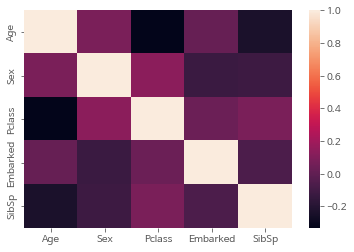

In [ ]:
import seaborn as sns
corr = X.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
#Train test validation set은 6/2/2가 좋으나 여기서는 testset이 이미 빠져있으므로 test_size 20%으로 선언
from sklearn.model_selection import train_test_split
XTrain, XValid, YTrain, YValid = train_test_split(
      X, Y, test_size=0.33)

In [ ]:
from sklearn.linear_model import LogisticRegression
from subprocess import check_output
from sklearn.ensemble import RandomForestClassifier, VotingClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm, neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier


model1 = svm.LinearSVC()
model2 = neighbors.KNeighborsClassifier()
model3 =RandomForestClassifier()
model4 =LogisticRegression()
model5 =LinearDiscriminantAnalysis()
model6 = DecisionTreeClassifier()
model7 = MLPClassifier()
model8 = ExtraTreesClassifier()
model9 = AdaBoostClassifier()
model10 = GradientBoostingClassifier()
model11 =XGBClassifier(Eta=0.2)



clf = VotingClassifier(estimators=[
                        ('lsvc', model1),  #0.78 0.78
                        ('knn', model2), #0.75 #0.85
                        ('rfor', model3), #0.8 #0.81
                        ('lr', model4), #0.8 #0.78
                        ('lda', model5), #0.78 #0.77
                        ('dc', model6), #0.81 #0.82
                        ('mlpc', model7), #0.78 #0.8
                        ('etc', model8), #0.78 #0.81
                        ('abc', model9), #0.8 #0.81
                        ("gbc",model10), #0.76 #0.8/
                        ("XG",model11) #0.81
                        
                                ], voting = 'hard')
clf.fit(XTrain, YTrain)


confidence = clf.score(XValid, YValid)
print('accuracy:',confidence)
predictions = clf.predict(XTest)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy: 0.8101694915254237


In [ ]:
clf

VotingClassifier(estimators=[('lsvc',
                              LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p...
                                            colsample_bynode=1,
                  

In [ ]:
#제출
# sub = pd.DataFrame({'PassengerId': test_val['PassengerId'],
#                     'Survived': yPredTest})
# sub.to_csv('scikitLRExample.csv', index=False)
sub = pd.DataFrame({'PassengerId': test_val['PassengerId'],
                    'Survived': predictions})
sub#.to_csv('scikitLRExample.csv', index=False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## EDA

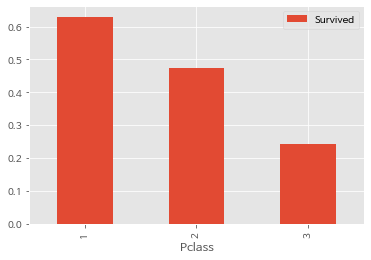

In [ ]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


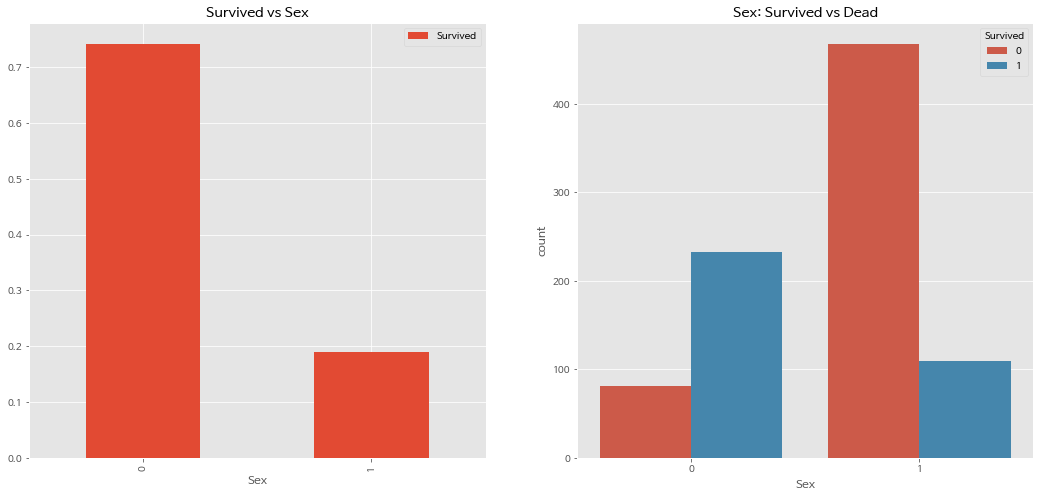

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=train_data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


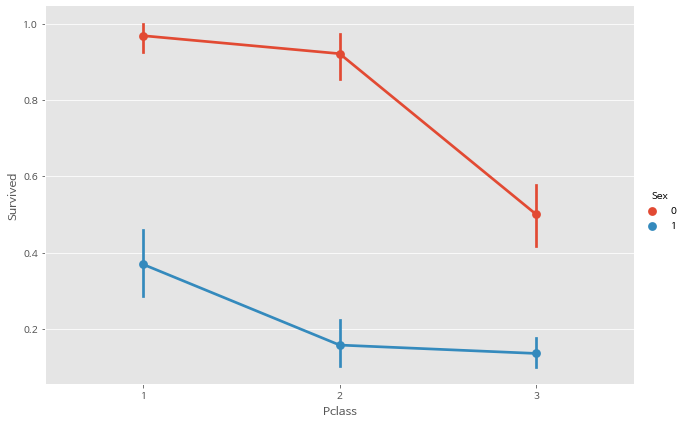

In [ ]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train_data, 
               size=6, aspect=1.5)

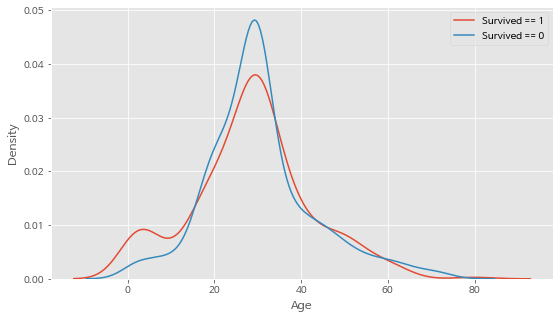

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(train_data[train_data['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(train_data[train_data['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

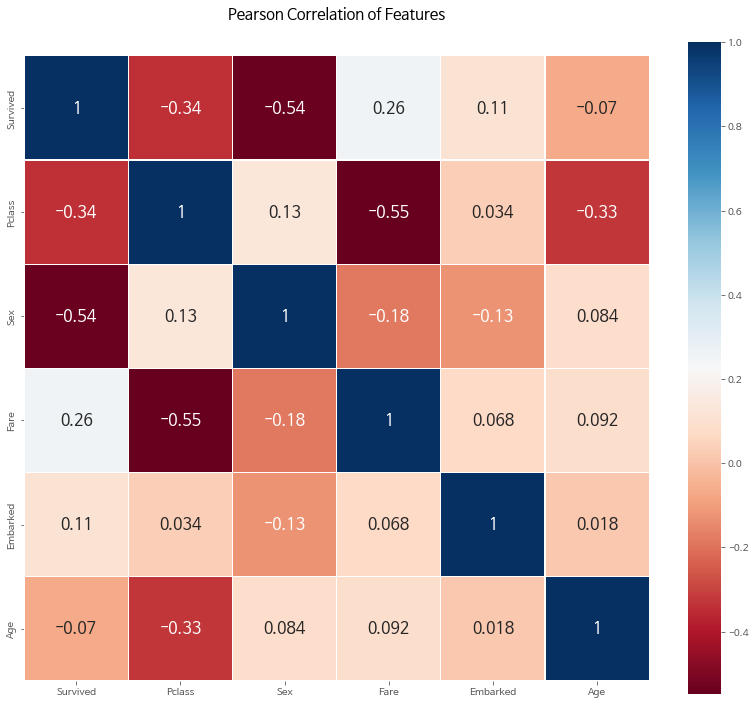

In [ ]:
heatmap_data = train_data[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'Age']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

우리가 EDA에서 살펴봤듯이,
Sex 와 Pclass 가 Survived 에 상관관계가 어느 정도 있음을 볼 수 있습니다.

생각보다 fare 와 Embarked 도 상관관계가 있음을 볼 수 있습니다.

또한 우리가 여기서 얻을 수 있는 정보는
서로 강한 상관관계를 가지는 feature들이 없다는 것입니다.
(Age와 Age_cat 제외..)
이것은 우리가 모델을 학습시킬 때, 불필요한 feature 가 없다는 것을 의미합니다.
1 또는 -1 의 상관관계를 가진 feature A, B 가 있다면, 우리가 얻을 수 있는 정보는 사실 하나일 거니까요.

이제 실제로 모델을 학습시키기 앞서서 data preprocessing (전처리)을 진행해보겠습니다.
거의 다 와갑니다 힙냅시다!

In [ ]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,2,1,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,3,0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,1,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,3,0,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,2,1,35.0,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,2,1,27.0,0,0,211536,13.0000,NaN,0
887,888,1,1,1,0,19.0,0,0,112053,30.0000,B42,0
888,889,0,3,1,0,29.7,1,2,W./C. 6607,23.4500,NaN,0
889,890,1,1,2,1,26.0,0,0,111369,30.0000,C148,1


In [ ]:
train_data.iloc[0][5]

22.0

In [ ]:
for i in index_NaN_age :
    age_med = dataset["Age"].median()
    age_pred = dataset["Age"][((dataset['SibSp'] == dataset.iloc[i]["SibSp"]) & (dataset['Parch'] == dataset.iloc[i]["Parch"]) & (dataset['Pclass'] == dataset.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        dataset['Age'].iloc[i] = age_pred
    else :
        dataset['Age'].iloc[i] = age_med